In [38]:
import librosa
import ffmpeg

In [ ]:
from librosa import 

In [36]:
#!pip install librosa
#!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6086 sha256=d3500d70e9314f97f3236cab33bfa05a1ebd6e26adca884c9206aa6118d0927c
  Stored in directory: c:\users\jornkric\appdata\local\pip\cache\wheels\64\80\6e\caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [5]:
pwd

'C:\\Users\\jornkric\\OneDrive - Tieto Corporation\\Courses_summer_2020\\Audio-Data-Analysis-Using-Deep-Learning'

In [4]:
audio_data = 'helloworld.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(25402,) 22050


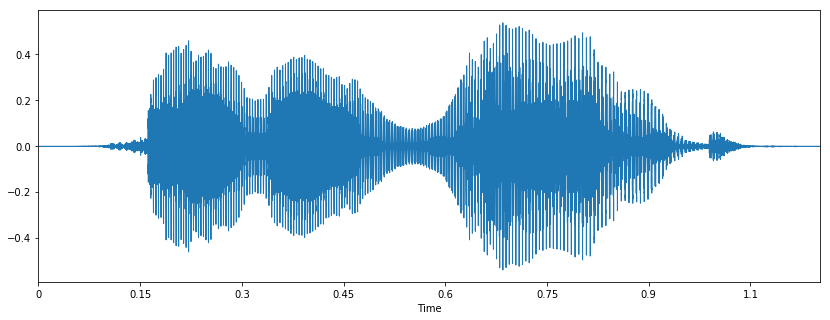

In [6]:
#Visualize an audio file
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [7]:
import IPython.display as ipd
ipd.Audio(audio_data)

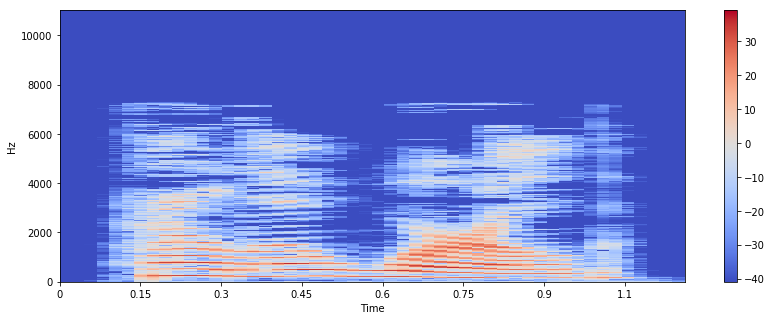

In [8]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

C:\Users\jornkric\AppData\Local\Continuum\anaconda3\lib\site-packages\librosa\display.py:823: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  "Trying to display complex-valued input. " "Showing magnitude instead."


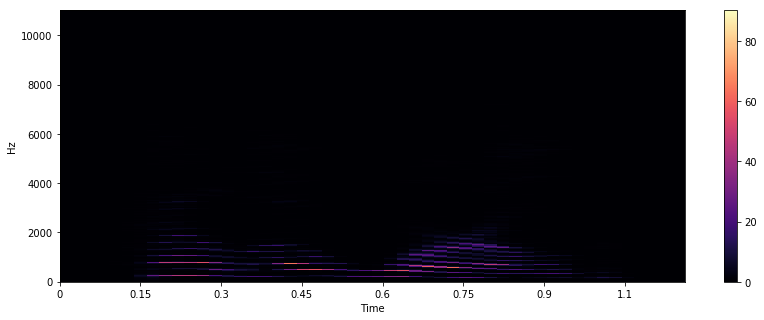

In [24]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(X, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [15]:
X.shape

(1025, 50)

In [16]:
Xdb.shape

(1025, 50)

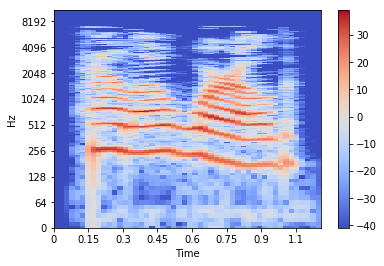

In [25]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [32]:
# Create audio 
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
#x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
x = 0.5*np.sin(2*np.pi*440*t)# pure sine wave at 440 Hz

In [46]:
x.shape

(110250,)

In [33]:
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

In [39]:
#Saving the audio
librosa.output.write_wav('tone_220.wav', x, sr)

AttributeError: module 'librosa' has no attribute 'output'

In [40]:
librosa.__version__

'0.8.0'

In [47]:
audio_data = 'helloworld.wav'
x , sr = librosa.load(audio_data)
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(25402,) 22050


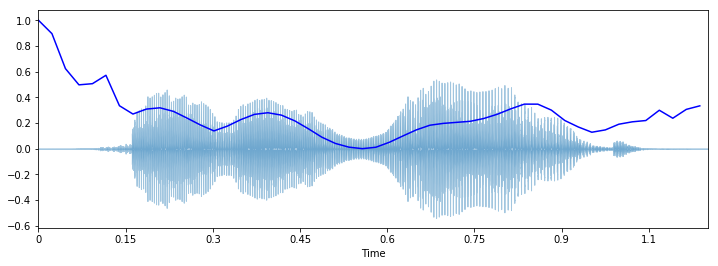

In [49]:
# centroids
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

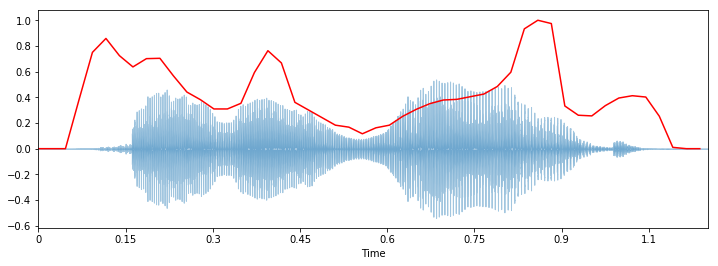

In [50]:
# SPectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

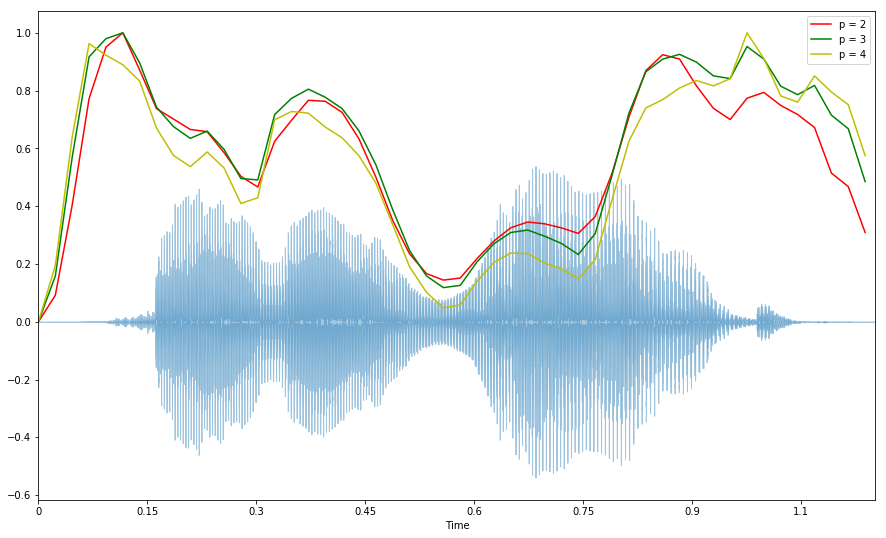

In [51]:
# Spectral bandwidth 
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

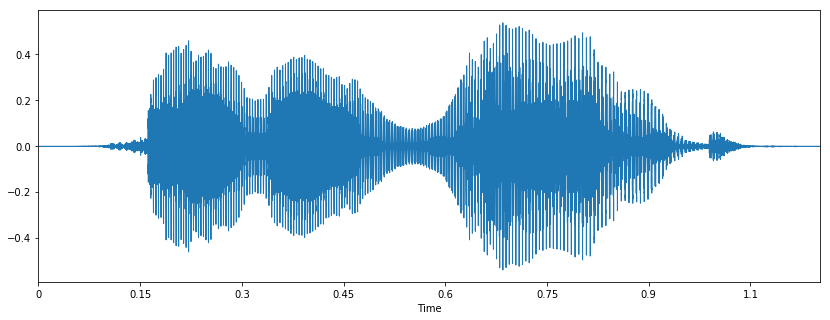

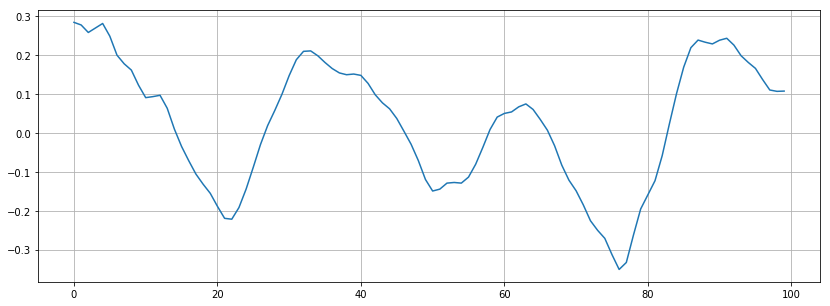

In [53]:
# Zero crossings 
#x, sr = librosa.load('/../../gruesome.wav')
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)
# Zooming in
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [54]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


(20, 50)


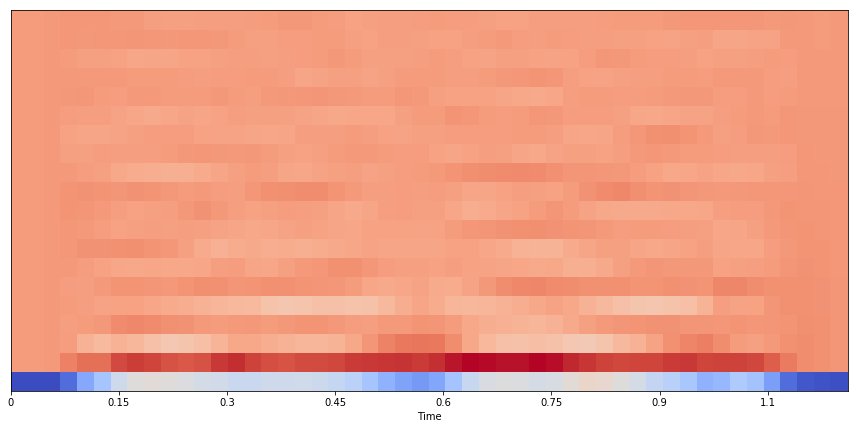

In [56]:
# Mel-Frequency Cepstral Coefficients(MFCCs) 
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
(20, 97)
#Displaying  the MFCCs:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

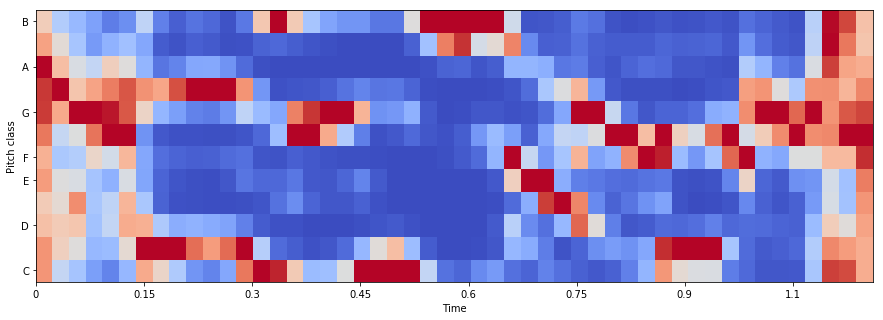

In [58]:
# Chroma feature 
hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')